In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
patients = pd.read_csv(r"C:\Users\hp\Desktop\HEALTHCARE_PROJECT\data\raw\indian_liver_patient.csv")
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [25]:
patients.shape

(583, 11)

In [26]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [27]:
patients.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: xlabel='Gender'>

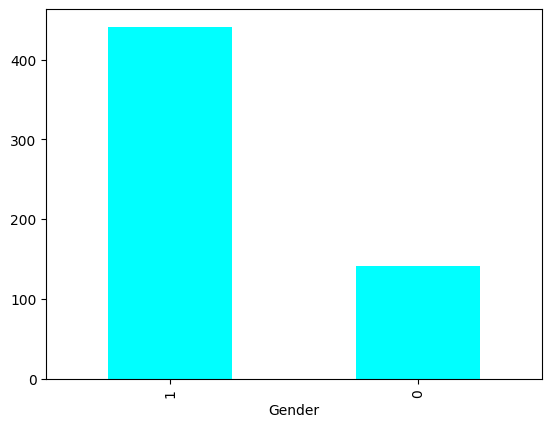

In [6]:
patients['Gender'].value_counts().plot.bar(color='cyan')

<Axes: xlabel='Dataset'>

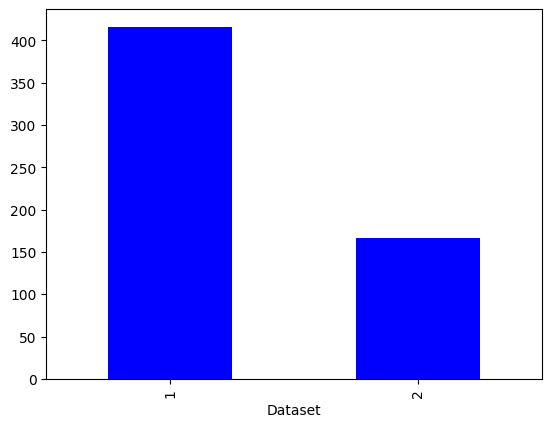

In [7]:
patients['Dataset'].value_counts().plot.bar(color='blue')

In [28]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [29]:
patients['Albumin_and_Globulin_Ratio'].mean()

np.float64(0.9470639032815197)

In [30]:
patients=patients.fillna(0.94)

In [31]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<Axes: xlabel='Age'>

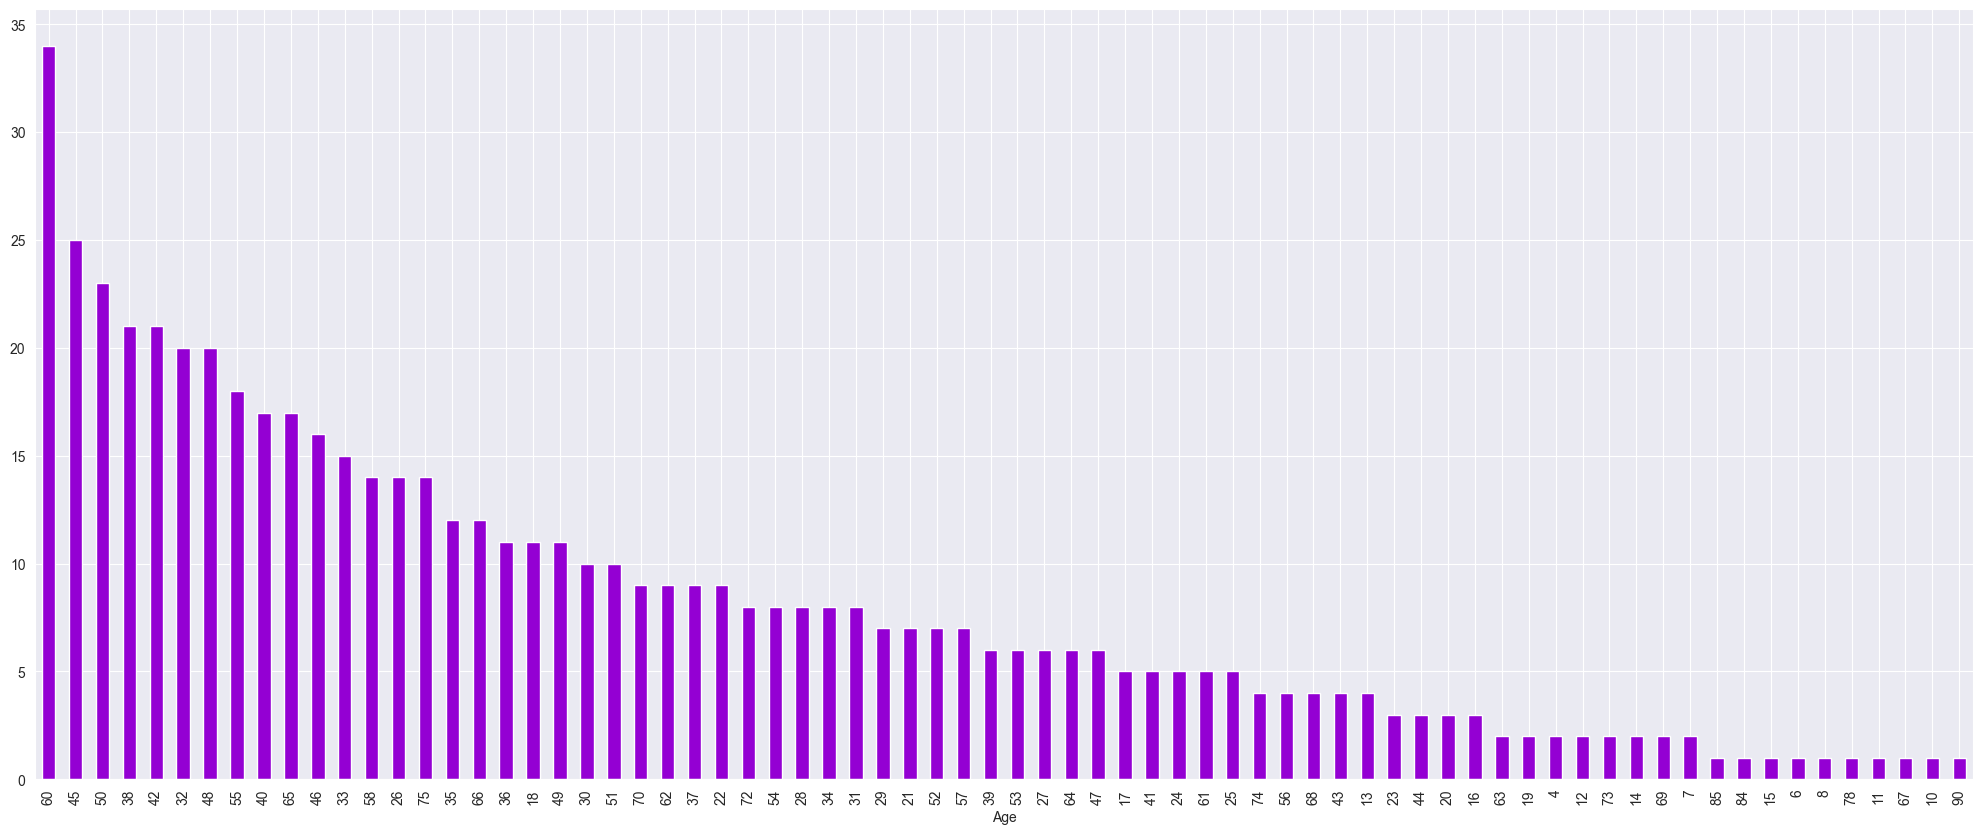

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

In [32]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


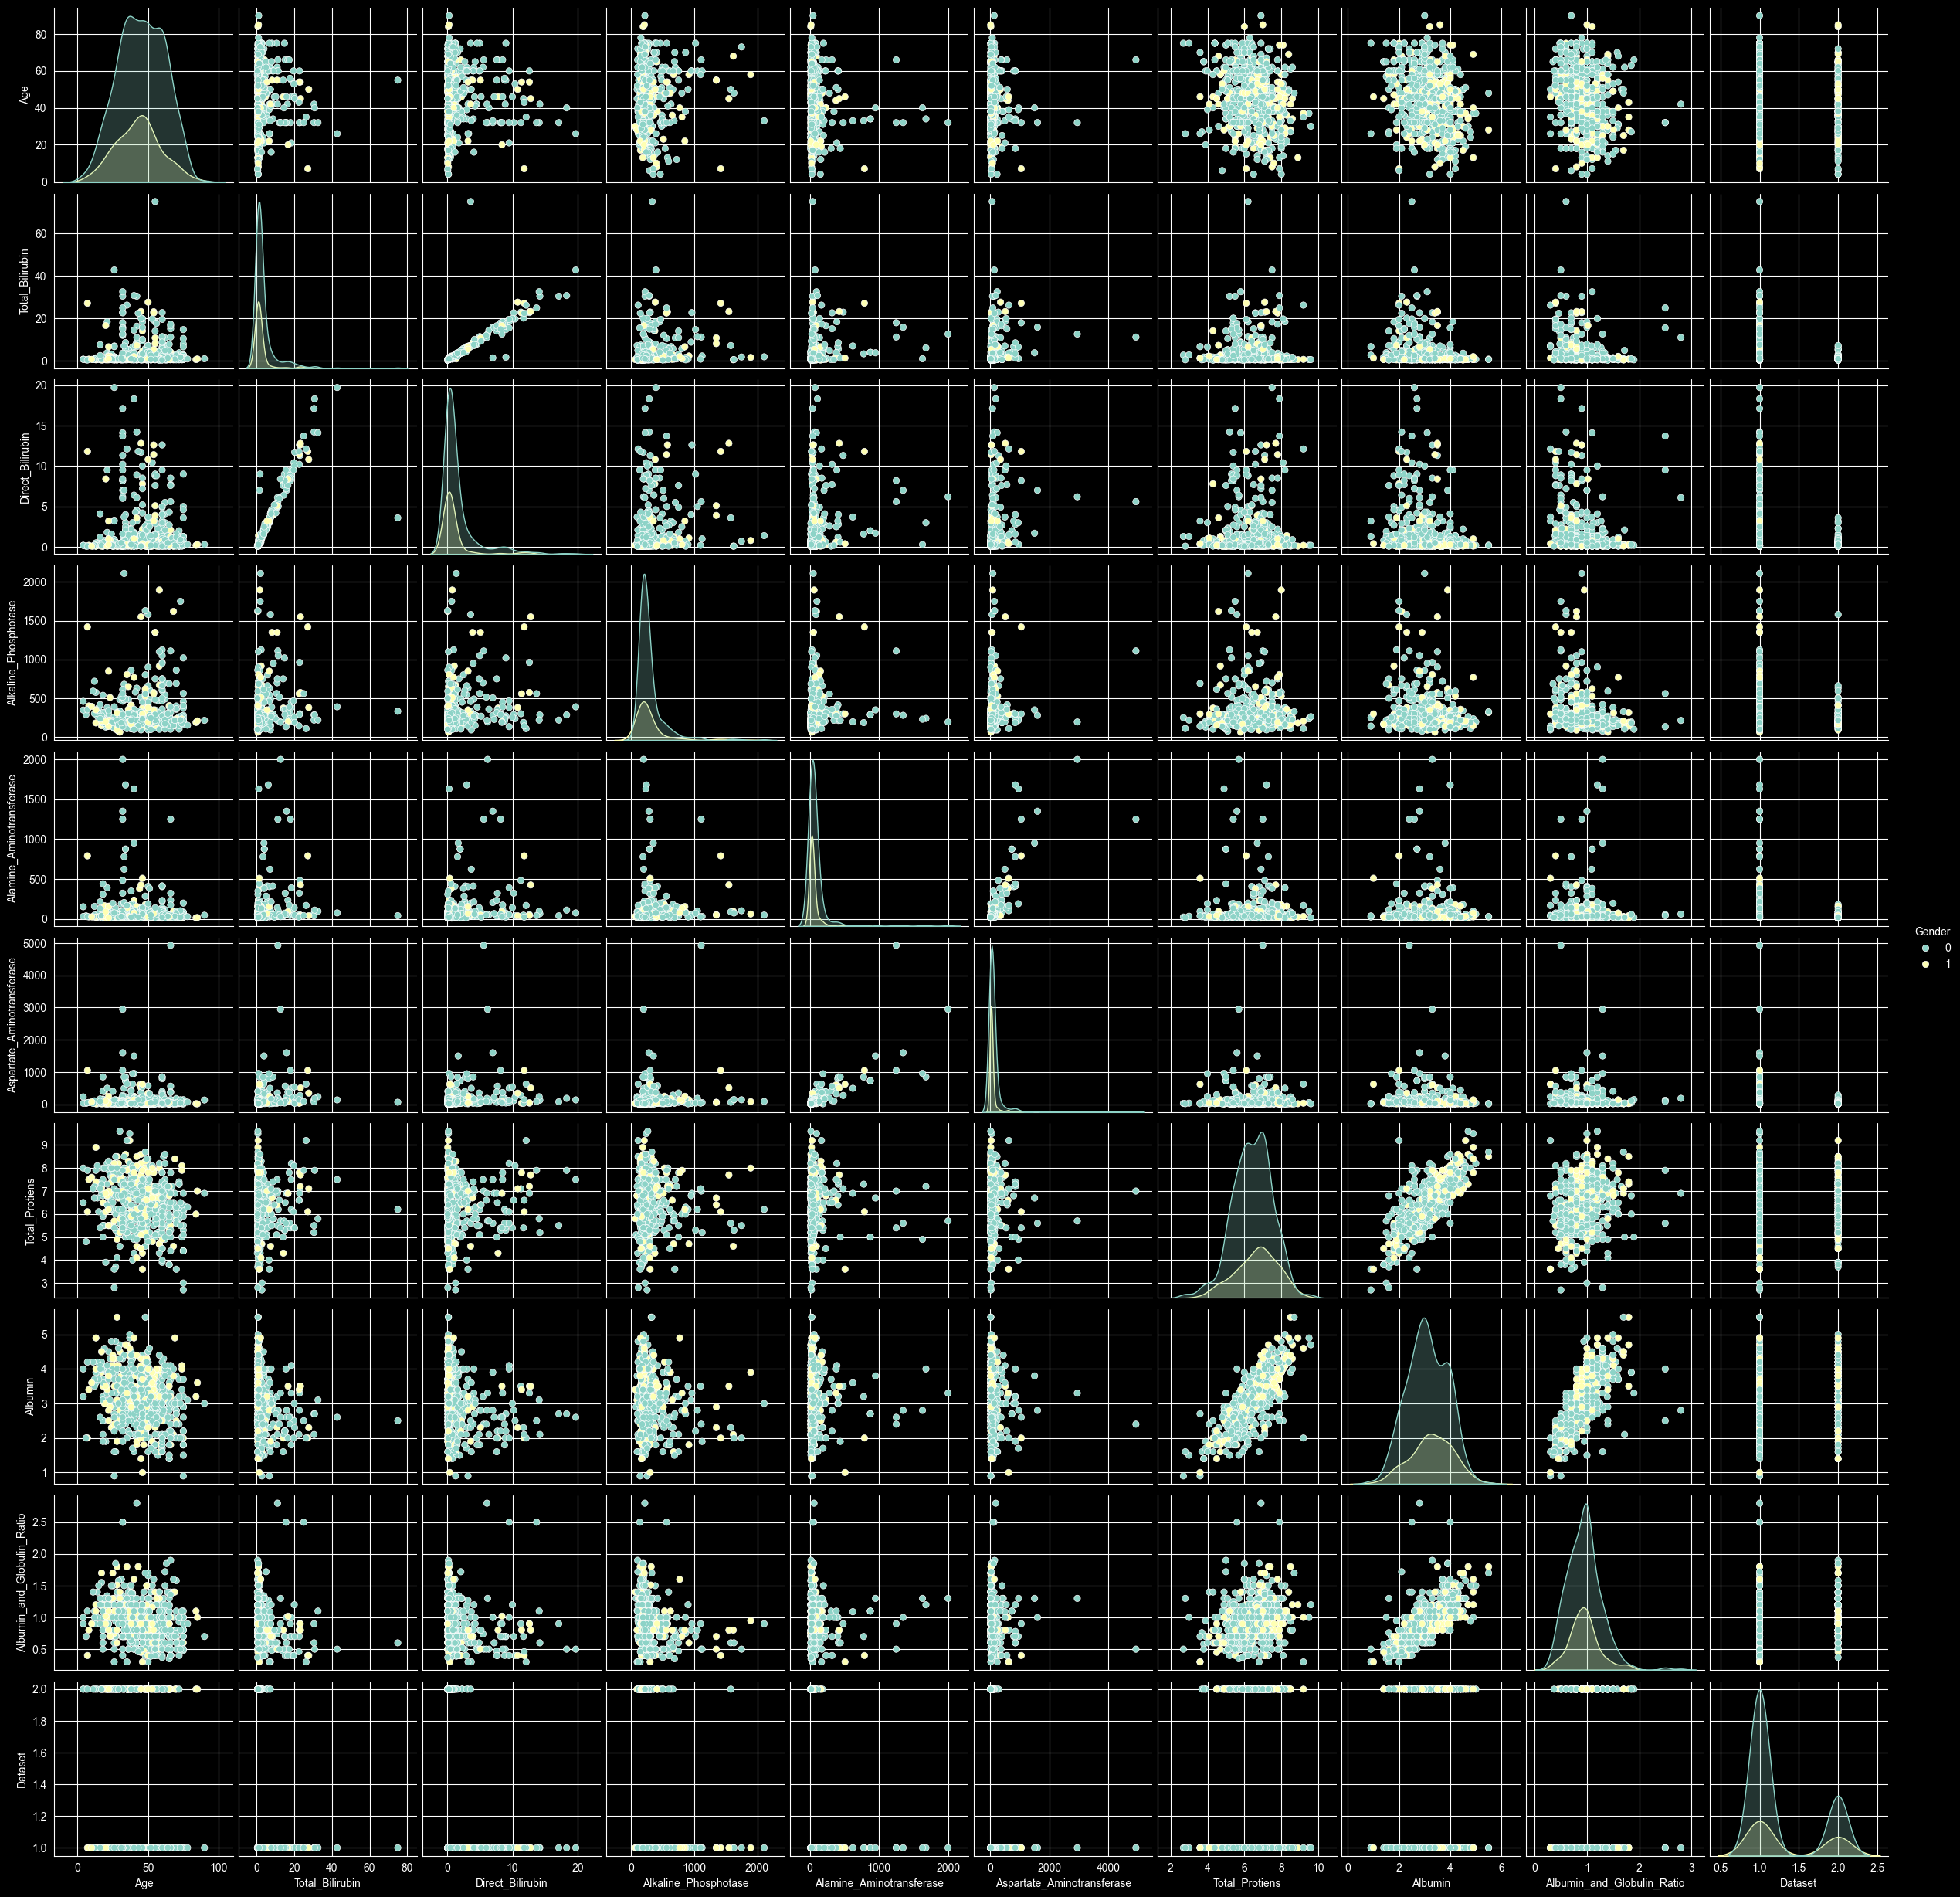

In [18]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

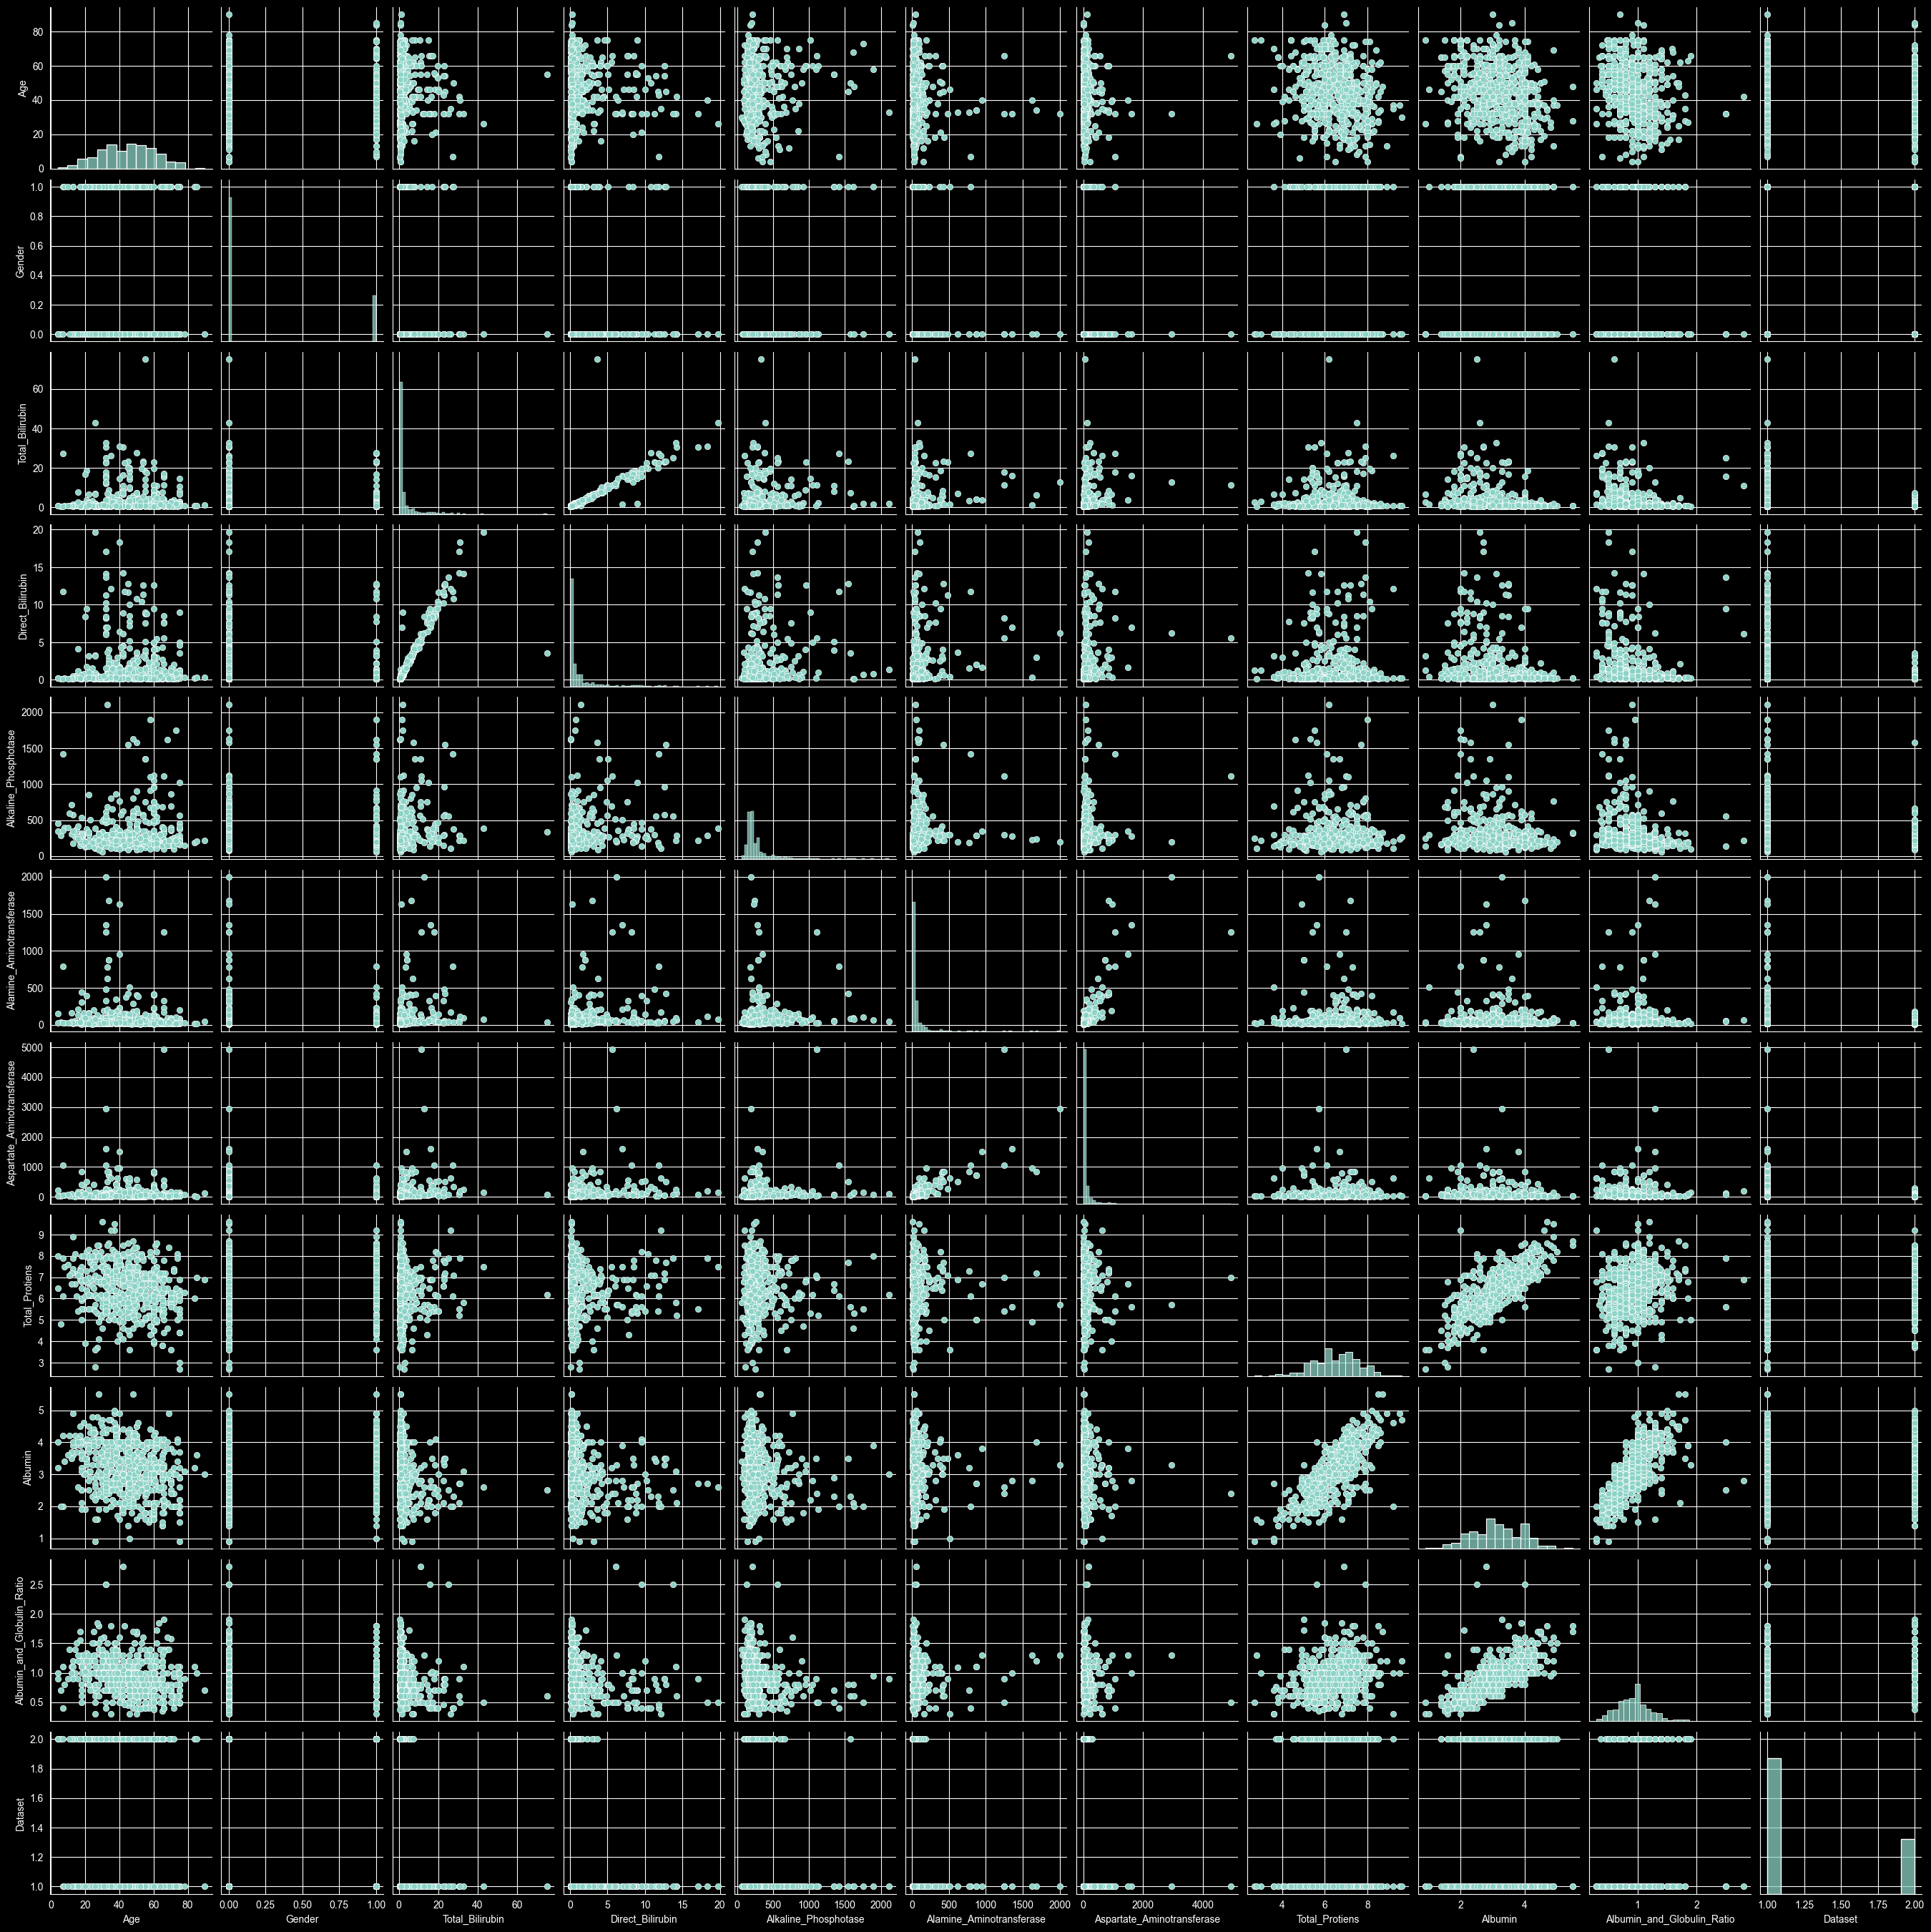

In [19]:
sns.pairplot(patients)

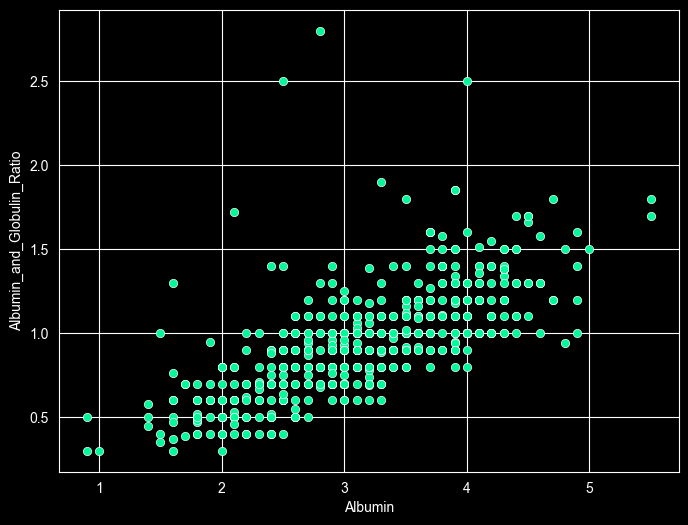

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

<Axes: xlabel='Gender'>

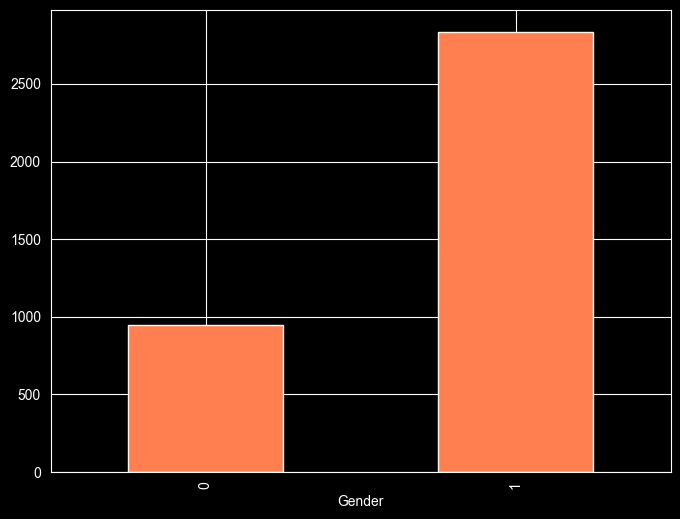

In [33]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<Axes: xlabel='Gender'>

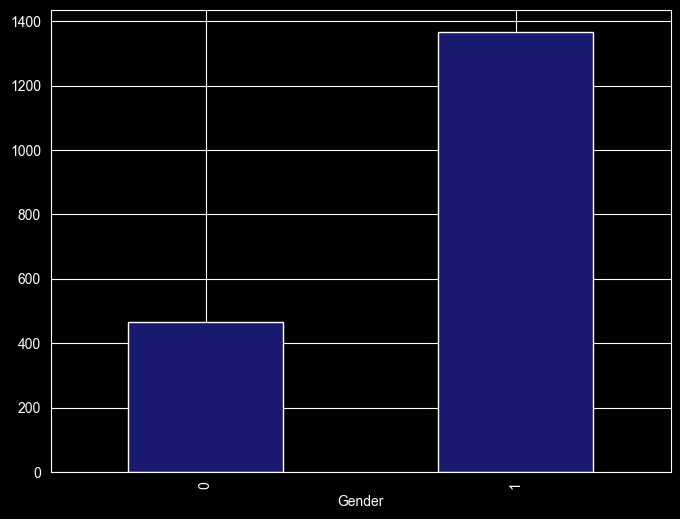

In [34]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<Axes: xlabel='Gender'>

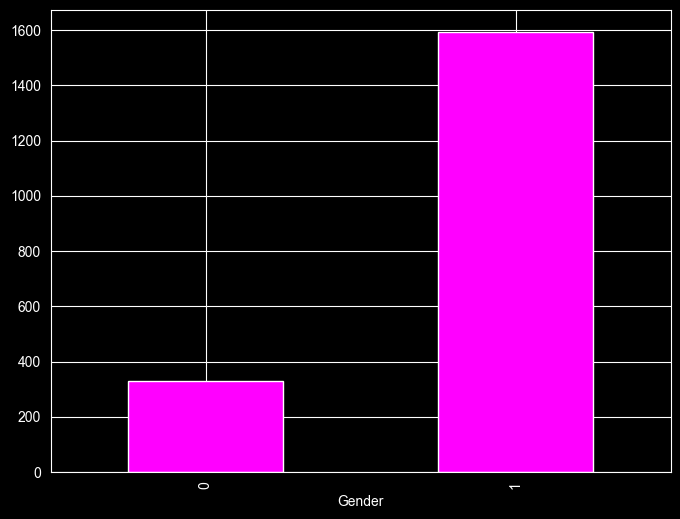

In [35]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

<Axes: >

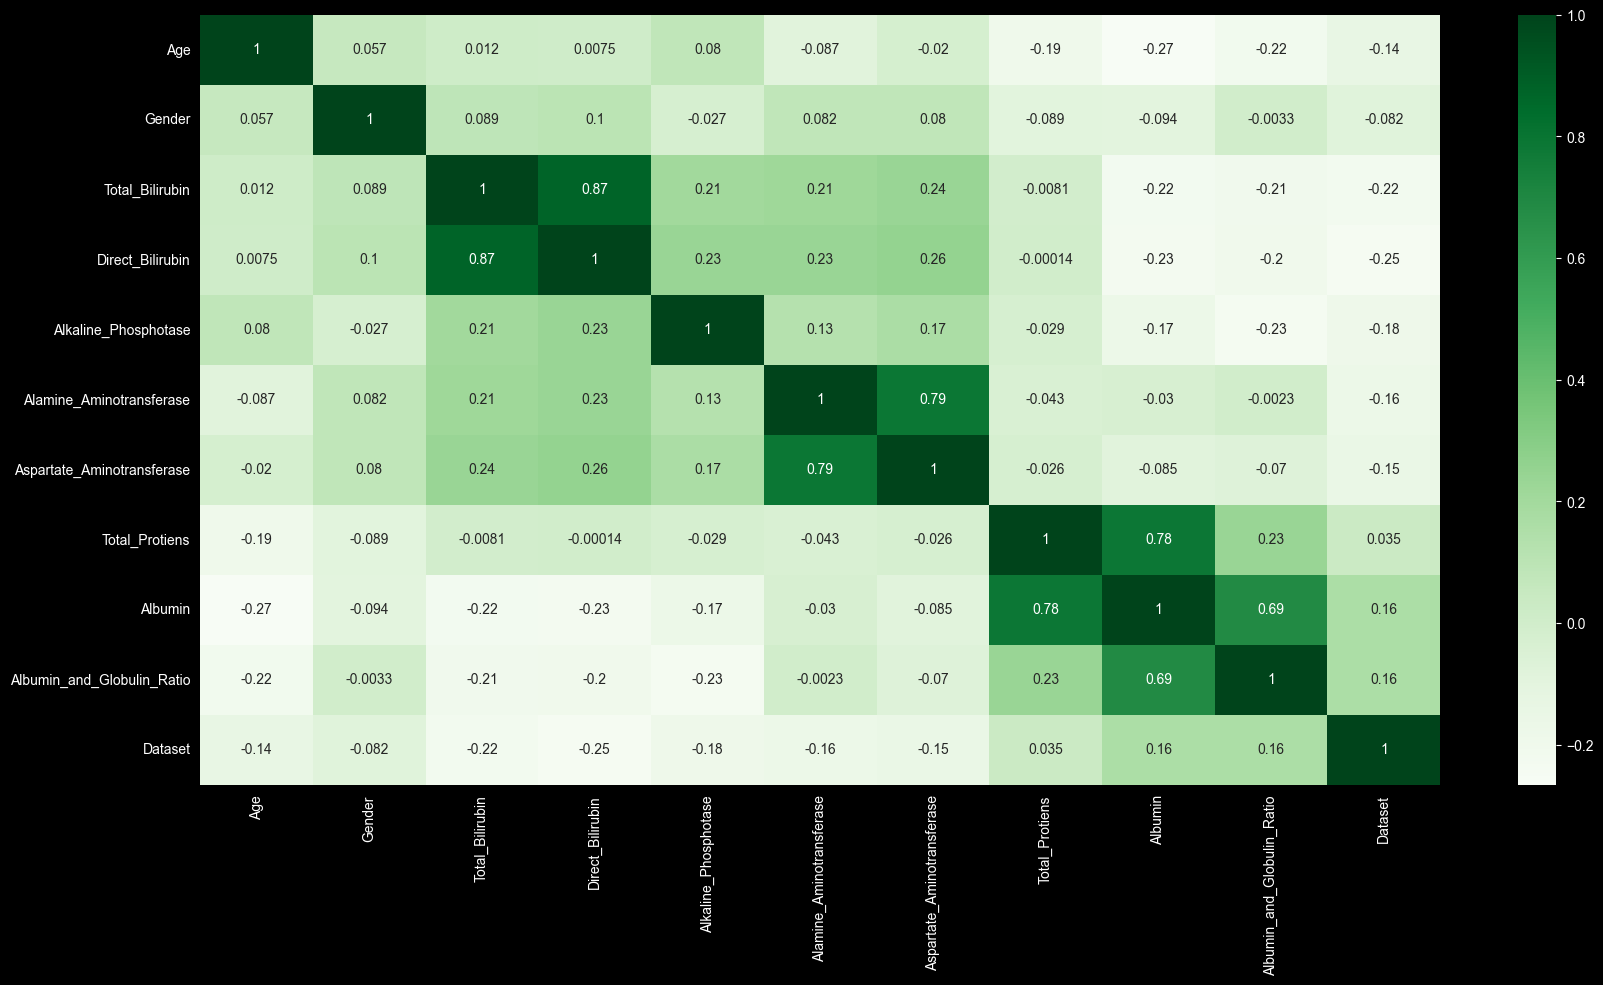

In [36]:
corr=patients.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [37]:
from sklearn.model_selection import train_test_split
patients.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [39]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Enable shuffle if you want reproducibility
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

logmodel = LogisticRegression(C=1, penalty='l1', solver='liblinear')  # solver required for l1
results = cross_val_score(logmodel, X_train, y_train, cv=kfold)

print(results)
print("Accuracy:", results.mean() * 100)


[0.76829268 0.70731707 0.67073171 0.71604938 0.71604938]
Accuracy: 71.56880457693467


RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


RF Accuracy: 0.7371428571428571


EXTRA TREES CLASSIFIER

ET Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.91      0.85       126
           2       0.62      0.37      0.46        49

    accuracy                           0.76       175
   macro avg       0.70      0.64      0.65       175
weighted avg       0.74      0.76      0.74       175



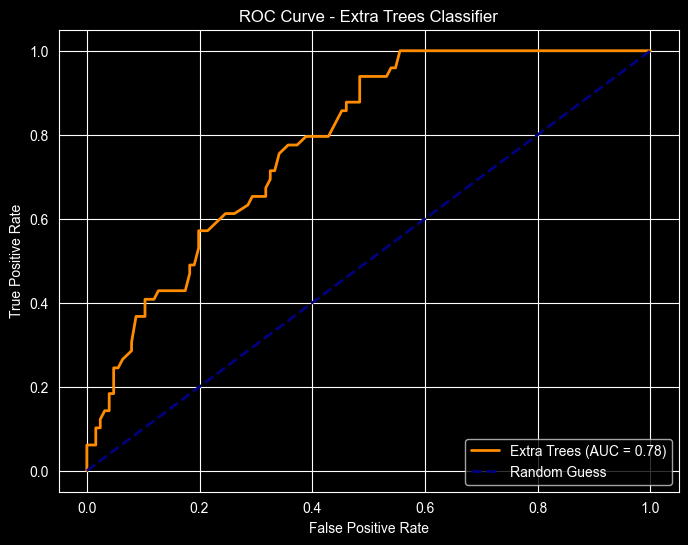

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees
et = ExtraTreesClassifier(n_estimators=200, random_state=42)
et.fit(X_train, y_train)

# Predictions
y_pred = et.predict(X_test)

# Accuracy
print("ET Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve (binary classification with labels {1,2})
y_prob = et.predict_proba(X_test)[:,1]   # probability of class '2'
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Extra Trees (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Extra Trees Classifier")
plt.legend(loc="lower right")
plt.show()


In [55]:
import pickle
# Save the trained model with pickle
with open("liverdiseasepredictionmodel.pkl", "wb") as f:
    pickle.dump(et, f)

print("Model saved as liverdiseasepredictionmodel.pkl")

Model saved as liverdiseasepredictionmodel.pkl


GRADIENT BOOSTING CLASSIFIER

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
print("GB Accuracy:", accuracy_score(y_test, gb.predict(X_test)))


GB Accuracy: 0.72


SVM

In [46]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))


SVM Accuracy: 0.72


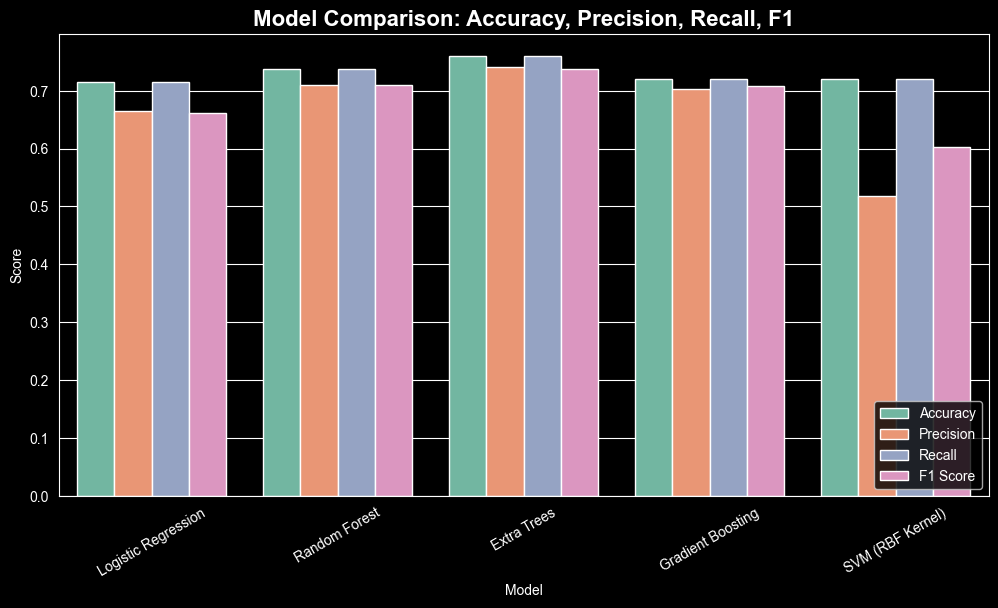

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", C=1, gamma="scale", probability=True)
}

# Collect metrics
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

results_df = pd.DataFrame(metrics)

# Melt for grouped bar chart
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, palette="Set2")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1", fontsize=16, fontweight="bold")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend(loc="lower right")
plt.show()


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

# Initialize model
et = ExtraTreesClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=et,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring="accuracy",
    n_jobs=-1          # use all cores
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
print("Test Accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Accuracy: 0.7207467630231857
Test Accuracy: 0.72


In [52]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions
param_dist = {
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": [None] + list(np.arange(5, 50, 5)),
    "min_samples_split": np.arange(2, 20, 2)
}

# Initialize model
et = ExtraTreesClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=et,
    param_distributions=param_dist,
    n_iter=30,          # number of random combinations to try
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)
print("Test Accuracy:", random_search.best_estimator_.score(X_test, y_test))


Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': np.int64(14), 'max_depth': np.int64(40)}
Best CV Accuracy: 0.7208370972598614
Test Accuracy: 0.7257142857142858
